In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pulsar-stars.csv") 

In [3]:
df.head()
df.shape

(17898, 9)

In [4]:
X = df.drop('target_class',axis=1)
y = df.target_class

In [5]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [6]:
df.shape

(17898, 9)

In [7]:
new_df = pd.DataFrame()
new_df['IP_Mean'] = df.iloc[:,0]
new_df['IP_std'] = df.iloc[:,1]
new_df['IP_Excess_kurtosis'] = df.iloc[:,2]
new_df['IP_Skewness'] = df.iloc[:,3]
new_df['DM_SNR_Mean'] = df.iloc[:,4]
new_df['DM_SNR_std'] = df.iloc[:,5]
new_df['DM_SNR_kurtosis'] = df.iloc[:,6]
new_df['DM_SNR_Skewness'] = df.iloc[:,7]
new_df['Target'] = df.iloc[:,8]
new_df

,IP_Mean,IP_std,IP_Excess_kurtosis,IP_Skewness,DM_SNR_Mean,DM_SNR_std,DM_SNR_kurtosis,DM_SNR_Skewness,Target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [8]:
X = new_df.drop('Target',axis=1)
y = new_df.Target

In [9]:
distribution_of_the_target_class = y.value_counts()
distribution_of_the_target_class
new_df.isnull().sum()

IP_Mean               0
IP_std                0
IP_Excess_kurtosis    0
IP_Skewness           0
DM_SNR_Mean           0
DM_SNR_std            0
DM_SNR_kurtosis       0
DM_SNR_Skewness       0
Target                0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

<Figure size 800x900 with 0 Axes>

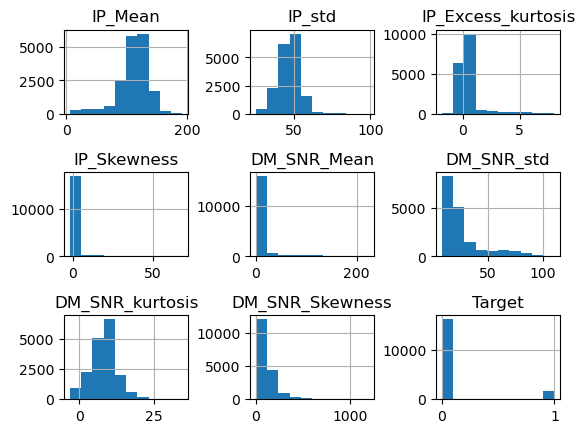

In [11]:
plt.figure(figsize=(8,9))
new_df.hist();
plt.subplots_adjust(hspace=0.7, wspace=0.5)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)


In [14]:
corr_mat = X_train.corr()
corr_mat

,IP_Mean,IP_std,IP_Excess_kurtosis,IP_Skewness,DM_SNR_Mean,DM_SNR_std,DM_SNR_kurtosis,DM_SNR_Skewness
IP_Mean,1.000000,0.555476,-0.872750,-0.737306,-0.295808,-0.302581,0.231370,0.142441
IP_std,0.555476,1.000000,-0.528687,-0.543673,-0.001772,-0.054160,0.033102,0.028738
IP_Excess_kurtosis,-0.872750,-0.528687,1.000000,0.946210,0.414275,0.431562,-0.341319,-0.216255
IP_Skewness,-0.737306,-0.543673,0.946210,1.000000,0.416031,0.416783,-0.330500,-0.207519
DM_SNR_Mean,-0.295808,-0.001772,0.414275,0.416031,1.000000,0.795948,-0.617323,-0.358922
DM_SNR_std,-0.302581,-0.054160,0.431562,0.416783,0.795948,1.000000,-0.812440,-0.582631
DM_SNR_kurtosis,0.231370,0.033102,-0.341319,-0.330500,-0.617323,-0.812440,1.000000,0.925384
DM_SNR_Skewness,0.142441,0.028738,-0.216255,-0.207519,-0.358922,-0.582631,0.925384,1.000000


In [23]:
from sklearn import svm
default_model = svm.SVC(kernel='rbf')
default_model.fit(X_train, y_train)
predicted_val=default_model.predict(X_test)

In [26]:
from sklearn.metrics import f1_score
default_accuracy = accuracy_score(y_test, default_model.predict(X_test))
print("Model accuracy:", default_accuracy)

Model accuracy: 0.9733705772811918


In [27]:
model11 = svm.SVC(kernel = 'rbf',C=100)
model12 = svm.SVC(kernel = 'rbf',C=1000)

mode21 = svm.SVC(kernel = 'linear',C=1.0)
mode22 = svm.SVC(kernel = 'linear',C=100.0)
mode23 = svm.SVC(kernel = 'linear',C=1000.0)

mode31 = svm.SVC(kernel = 'poly',C=1.0)
mode32 = svm.SVC(kernel = 'poly',C=100.0)

mode41 = svm.SVC(kernel = 'sigmoid',C=1.0)
mode42 = svm.SVC(kernel = 'sigmoid',C=100)

In [ ]:
models = [model11,model12,mode21,mode22,mode23,mode32,mode41,mode42]

for model in models:
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    print(f"Accuracy of the model {model} is : {f1_score(y_test,predict,average='weighted'):.3f}")

Accuracy of the model SVC(C=100) is : 0.979
Accuracy of the model SVC(C=1000) is : 0.981
Accuracy of the model SVC(kernel='linear') is : 0.980
Accuracy of the model SVC(C=100.0, kernel='linear') is : 0.980


In [ ]:
accuracies = []
for parameter in parameters:
    model = SVC(kernel=parameter["kernel"], C=parameter["C"])
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(accuracy)

In [ ]:
best_accuracy = max(accuracies)
best_model_index = accuracies.index(best_accuracy)
best_model_params = parameters[best_model_index]

In [ ]:
print("Best model parameters:", best_model_params)
print("Justification: The model with parameters", best_model_params, "achieved the highest accuracy of", best_accuracy)